In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns; sns.set()
import matplotlib.ticker as mtick

%matplotlib inline

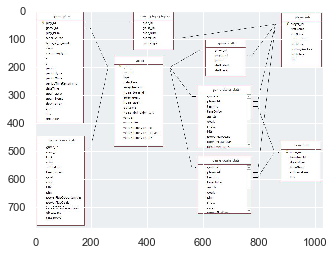

In [14]:
#Display the table relationship diagram
img=mpimg.imread(r'C:\Users\Pat\Documents\Thinkful\Files\table_relationships.JPG')
imgplot = plt.imshow(img)
plt.show()

In [15]:
#Read in all CSV files from repository
game = pd.read_csv(r'C:\Users\Pat\Documents\Thinkful\Files\game.csv')
game_goalie_stats = pd.read_csv(r'C:\Users\Pat\Documents\Thinkful\Files\game_goalie_stats.csv')
game_plays = pd.read_csv(r'C:\Users\Pat\Documents\Thinkful\Files\game_plays.csv')
game_plays_players = pd.read_csv(r'C:\Users\Pat\Documents\Thinkful\Files\game_plays_players.csv')
game_shifts = pd.read_csv(r'C:\Users\Pat\Documents\Thinkful\Files\game_shifts.csv')
game_skater_stats = pd.read_csv(r'C:\Users\Pat\Documents\Thinkful\Files\game_skater_stats.csv')
game_teams_stats = pd.read_csv(r'C:\Users\Pat\Documents\Thinkful\Files\game_teams_stats.csv')
player_info = pd.read_csv(r'C:\Users\Pat\Documents\Thinkful\Files\player_info.csv')
team_info = pd.read_csv(r'C:\Users\Pat\Documents\Thinkful\Files\team_info.csv')

In [7]:
#create dataframe of goalie with team name and player name
goalie_team = pd.merge(game_goalie_stats, team_info, on = 'team_id')
goalie_team = pd.merge(goalie_team, player_info, on = 'player_id')
#create dataframe of player with team name and player name
skater_team = pd.merge(game_skater_stats, team_info, on = 'team_id')
skater_team = pd.merge(skater_team, player_info, on = 'player_id')

In [20]:
game_plays.columns.unique()

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side'],
      dtype='object')

**nhlscrapi**

In [22]:
from nhlscrapi.games.game import Game, GameKey, GameType
from nhlscrapi.games.cumstats import Score, ShotCt, Corsi, Fenwick

season = 2014                                    # 2013-2014 season
game_num = 1226                                  #
game_type = GameType.Regular                     # regular season game
game_key = GameKey(season, game_type, game_num)

# define stat types that will be counted as the plays are parsed
cum_stats = {
  'Score': Score(),
  'Shots': ShotCt(),
  'Corsi': Corsi(),
  'Fenwick': Fenwick()
}
game = Game(game_key, cum_stats=cum_stats)

# also http requests and processing are lazy
# accumulators require play by play info so they parse the RTSS PBP
print('Final         : {}'.format(game.cum_stats['Score'].total))
print('Shootout      : {}'.format(game.cum_stats['Score'].shootout.total))
print('Shots         : {}'.format(game.cum_stats['Shots'].total))
print('EV Shot Atts  : {}'.format(game.cum_stats['Corsi'].total))
print('Corsi         : {}'.format(game.cum_stats['Corsi'].share()))
print('FW Shot Atts  : {}'.format(game.cum_stats['Fenwick'].total))
print('Fenwick       : {}'.format(game.cum_stats['Fenwick'].share()))

# http req for roster report
# only parses the sections related to officials and coaches
print('\nRefs          : {}'.format(game.refs))
print('Linesman      : {}'.format(game.linesman))
print('Coaches')
print('  Home        : {}'.format(game.home_coach))
print('  Away        : {}'.format(game.away_coach))

# scrape all remaining reports
game.load_all()

AttributeError: 'dict' object has no attribute 'iteritems'